In [1]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import polars as pl
from pathlib import Path

from src.plotting.final_figures import plot_duopoly_results_from_df

OUPUT_PATH = Path("../latex/imgs/res/")
OUPUT_PATH.mkdir(parents=True, exist_ok=True)
OUPUT_TABLES_PATH = Path("../latex/tables/")
OUPUT_TABLES_PATH.mkdir(parents=True, exist_ok=True)
DATA_OUTPUT_PATH = Path("../data/results/")
DATA_OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

DUOPOLY_OUPUT_PATH = Path(OUPUT_PATH) / "duopoly"
DUOPOLY_OUPUT_PATH.mkdir(parents=True, exist_ok=True)

In [2]:
df = pl.read_parquet(DATA_OUTPUT_PATH / "all_experiments.parquet").filter(
    pl.col("num_agents") == 2
)

# Symmetric case
---

In [3]:
df_sym = df.filter(df["is_symmetric"])
df_sym.head()

experiment_timestamp,experiment_name,num_agents,agent,round,start_time_exper,end_time_exper,a_0,a,mu,alpha,beta,sigma,c,group_idxs,monopoly_prices,monopoly_quantities,monopoly_profits,nash_prices,nash_quantities,nash_profits,agent_prefix,agent_prefix_type,agent_prompt,agent_memory_length,agent_model,agent_env_env_index,agent_env_a,agent_env_alpha,agent_env_c,observations,plans,insights,chosen_price,marginal_cost,quantity,profit,market_data,is_symmetric,is_synthetic
str,str,i64,str,i64,str,str,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,str,str,str,i64,str,i64,f64,f64,f64,str,str,str,f64,f64,f64,f64,str,bool,bool
"""1751011504""","""duopoly_setting_P1""",2,"""Firm A""",1,"""2025-06-27T10:05:04.145806""","""2025-06-27T10:44:53.863869""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""The current market data sectio…","""Since there is no historical d…","""Given the lack of data, our in…",2.0,1.0,49.55,49.55,"""- My price: 2.0 - Competitor's…",true,true
"""1751011504""","""duopoly_setting_P1""",2,"""Firm A""",2,"""2025-06-27T10:05:04.145806""","""2025-06-27T10:44:53.863869""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""The initial price of 2.0 resul…","""Continue testing the planned p…","""The initial test at price 2.0 …",2.5,1.0,10.65,15.98,"""- My price: 2.5 - Competitor's…",true,true
"""1751011504""","""duopoly_setting_P1""",2,"""Firm A""",3,"""2025-06-27T10:05:04.145806""","""2025-06-27T10:44:53.863869""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""The price of 2.5 resulted in a…","""Test the prices of 3.0 and 3.5…","""The significant drop in quanti…",3.0,1.0,0.91,1.81,"""- My price: 3.0 - Competitor's…",true,true
"""1751011504""","""duopoly_setting_P1""",2,"""Firm A""",4,"""2025-06-27T10:05:04.145806""","""2025-06-27T10:44:53.863869""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""In Round 3, the price was set …","""Test the price of 2.25 next to…","""The data from Round 3 reinforc…",2.25,1.0,21.19,26.49,"""- My price: 2.25 - Competitor'…",true,true
"""1751011504""","""duopoly_setting_P1""",2,"""Firm A""",5,"""2025-06-27T10:05:04.145806""","""2025-06-27T10:44:53.863869""",0.0,2.0,0.25,1.0,100.0,0.0,1.0,1,1.924981,36.486208,33.749046,1.472929,47.137659,22.292752,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,1.0,1.0,"""In Round 4, the price was set …","""Test the price of 2.0 again to…","""The data from Round 4 suggests…",2.0,1.0,37.45,37.45,"""- My price: 2.0 - Competitor's…",true,true


## Plots

In [4]:
p_m = df_sym.select(pl.col("monopoly_prices")).min().to_series().to_list()[0]
q_m = df_sym.select(pl.col("monopoly_quantities")).min().to_series().to_list()[0]
pi_m = df_sym.select(pl.col("monopoly_profits")).min().to_series().to_list()[0]

p_nash = df_sym.select(pl.col("nash_prices")).min().to_series().to_list()[0]
pi_nash = df_sym.select(pl.col("nash_profits")).min().to_series().to_list()[0]
p_m, q_m, pi_m, p_nash, pi_nash

(1.9249809226802002,
 36.48620214955832,
 33.74904595088663,
 1.4729287006070746,
 22.29266581242071)

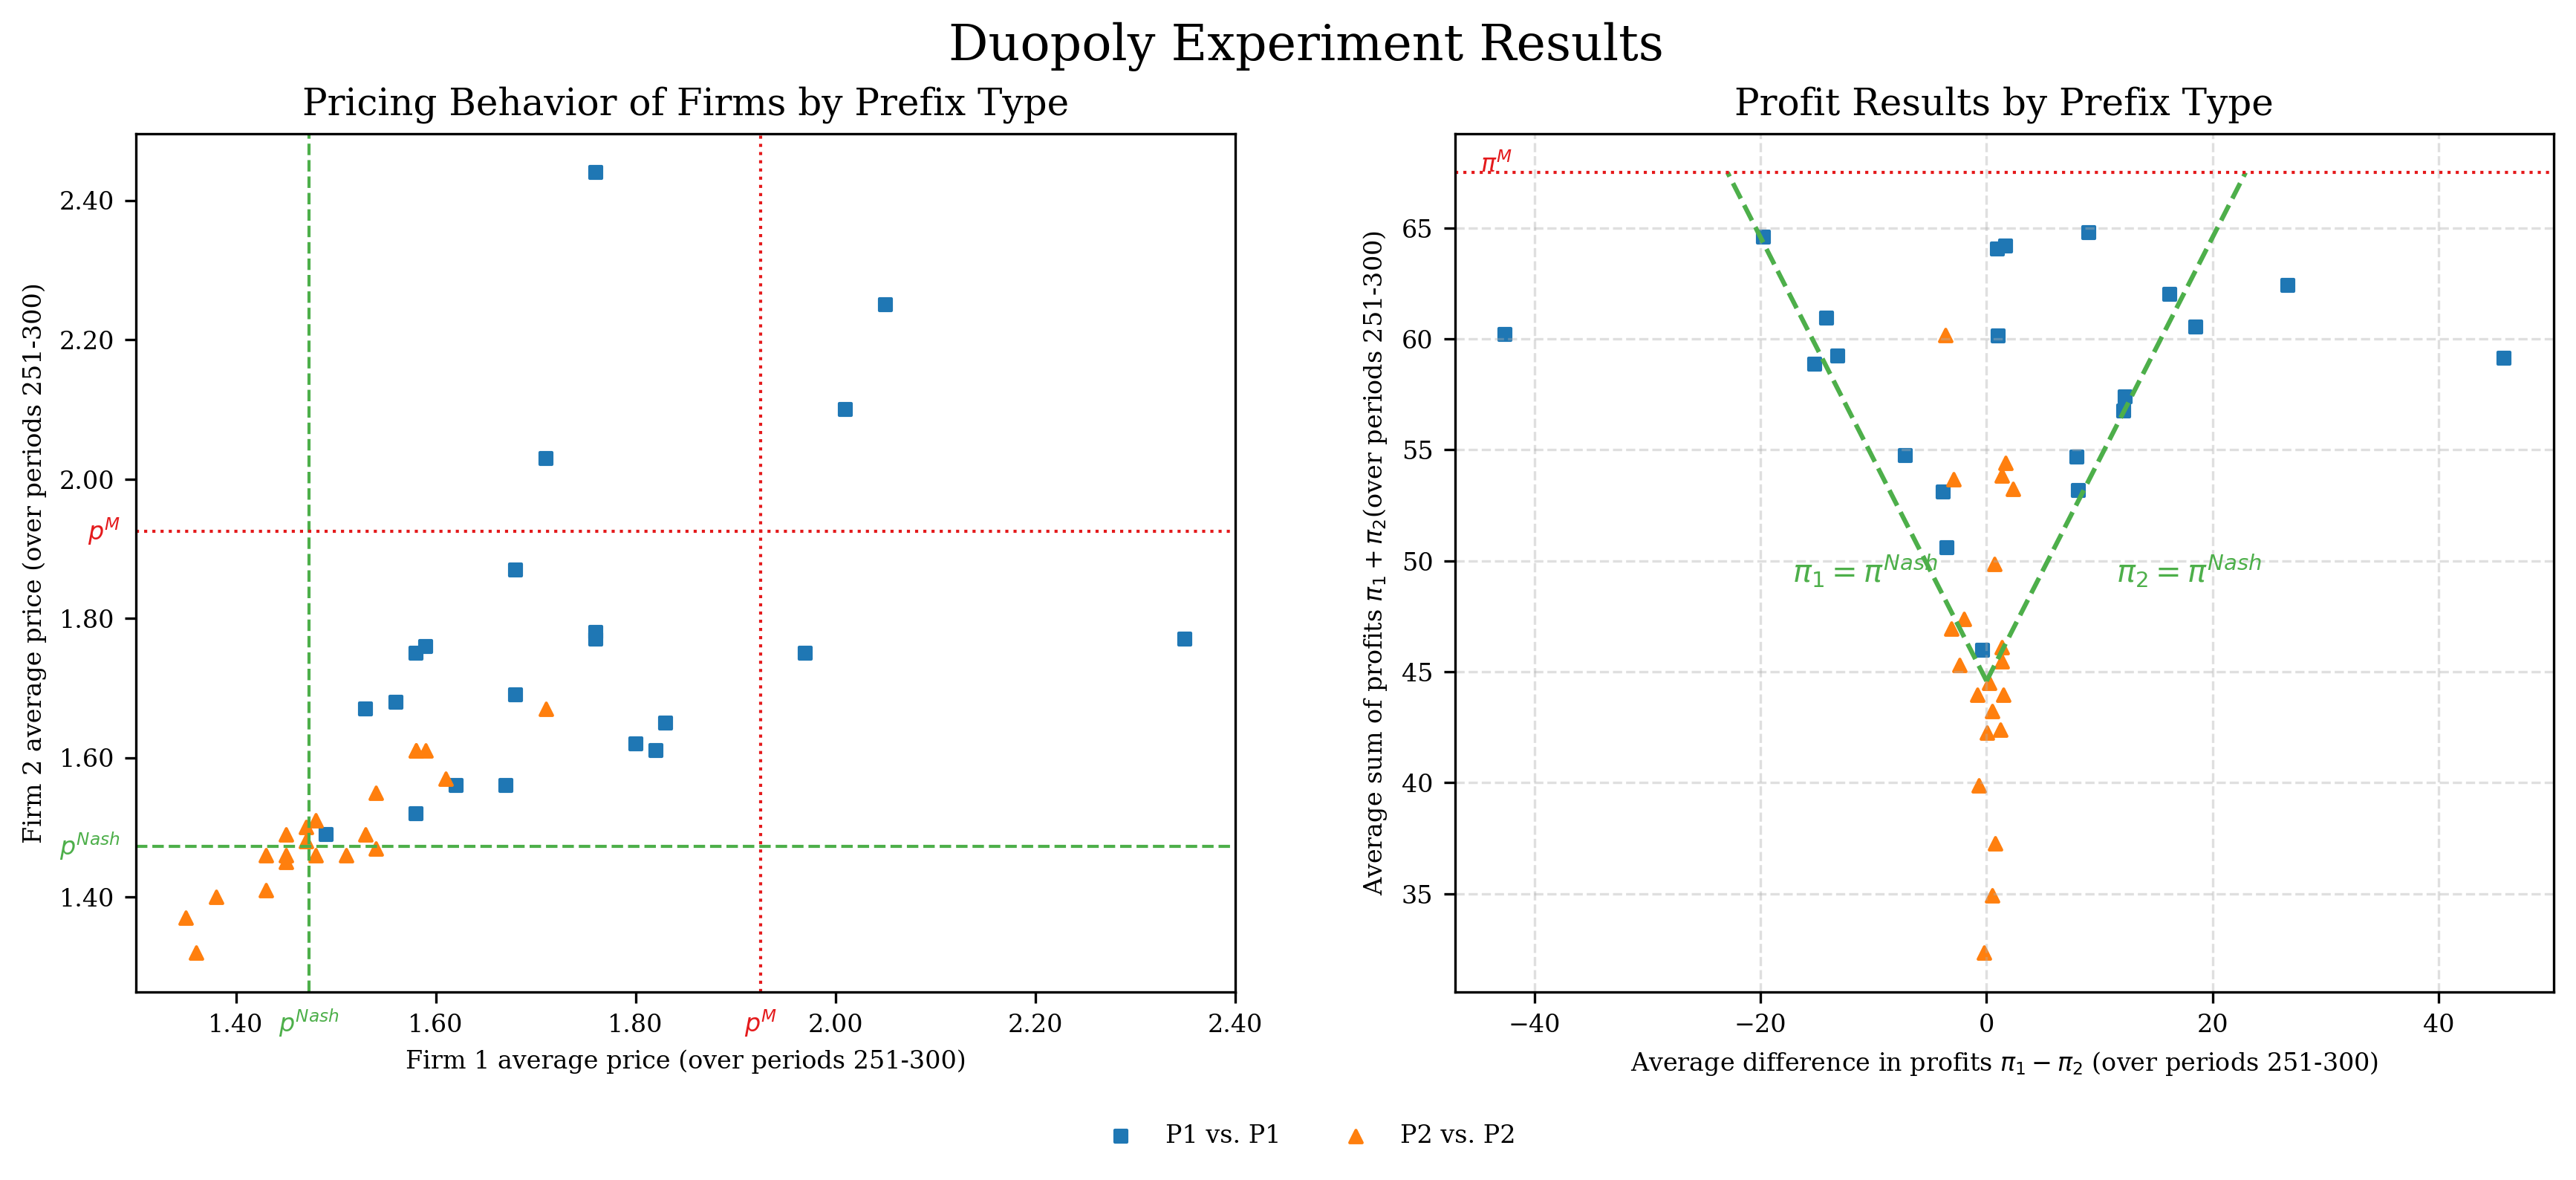

In [5]:
plot_duopoly_results_from_df(
    df=df_sym,
    p_nash=p_nash,
    p_m=p_m,
    pi_nash=pi_nash,
    pi_m=pi_m,
    title="Duopoly Experiment Results",
    save_path=DUOPOLY_OUPUT_PATH / "duopoly_experiment_symmetric_results",
)

# Asymmetric case
---

In [6]:
df_asym = df.filter(~df["is_symmetric"])
df_asym.head()

experiment_timestamp,experiment_name,num_agents,agent,round,start_time_exper,end_time_exper,a_0,a,mu,alpha,beta,sigma,c,group_idxs,monopoly_prices,monopoly_quantities,monopoly_profits,nash_prices,nash_quantities,nash_profits,agent_prefix,agent_prefix_type,agent_prompt,agent_memory_length,agent_model,agent_env_env_index,agent_env_a,agent_env_alpha,agent_env_c,observations,plans,insights,chosen_price,marginal_cost,quantity,profit,market_data,is_symmetric,is_synthetic
str,str,i64,str,i64,str,str,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,str,str,str,i64,str,i64,f64,f64,f64,str,str,str,f64,f64,f64,f64,str,bool,bool
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",1,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""The product cost is $1.00, and…","""Implement a basic price testin…","""Since there is no historical d…",4.51,1.0,0.09,0.31,"""- My price: 4.51 - Competitor'…",false,true
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",2,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""The initial price of $4.51 res…","""Continue with the price testin…","""The initial test at $4.51 show…",4.0,1.0,0.67,2.01,"""- My price: 4.0 - Competitor's…",false,true
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",3,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""The price reduction to $4.00 i…","""Continue exploring lower price…","""Lower prices have shown to att…",3.5,1.0,4.73,11.83,"""- My price: 3.5 - Competitor's…",false,true
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",4,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""In Round 3, the price was set …","""Continue testing lower price p…","""Lower prices have shown to att…",3.25,1.0,11.73,26.39,"""- My price: 3.25 - Competitor'…",false,true
"""1751124009""","""duopoly_setting_P1_asymmetric""",2,"""Firm A""",5,"""2025-06-28T17:20:09.901191""","""2025-06-28T18:03:46.613590""",0.0,2.75,0.25,1.0,100.0,0.0,1.0,1,2.384111,78.051897,108.032481,1.855187,70.766663,60.51875,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",100,"""mistral-large-2411""",0,2.75,1.0,1.0,"""The data shows that lowering t…","""Continue testing within the ra…","""Lower prices have consistently…",3.5,1.0,4.53,11.32,"""- My price: 3.5 - Competitor's…",false,true
